In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

## Results: sentence specific
        "Don't forget a jacket", "It's eleven o'clock",
       "I'm on my way to the meeting",
       "I think I have a doctor's appointment",
       "I think I've seen this before", 'I would like a new alarm clock',
       'I wonder what this is about', 'Maybe tomorrow it will be cold',
       'The airplane is almost full', 'That is exactly what happened',
       'The surface is slick', "We'll stop in a couple of minutes"
       

In [163]:
def get_plots(filename, title_):
    
    df = pd.read_csv(filename, sep='\t', header=None, names=['gen_emotion', 'text', 'raw', 'generated'])
#     .reset_index()
#     df = df[([x in range(0,len(df['text'].tolist()), 3) for x in df['index'].tolist()])]
#     df = df.drop(['index'], axis=1)
# #     df = df[df.text.isin(["I think I have a doctor's appointment","I would like a new alarm clock",
#                          "I'm on my way to the meeting"])]
    raw_lengths = [[float(y) for y in x[1:-1].replace(',','').split()] for x in df.raw.tolist()]
    generated = [[float(y) for y in x[1:-1].replace(',','').split()] for x in df.generated.tolist()]
    rmse = 0
    for i in range(len(raw_lengths)):
        rmse += np.sum((np.array(raw_lengths[i]) - np.array(generated[i]))**2)
    print(rmse/len(raw_lengths), len(raw_lengths))

    raw_lengths_ = []
    for x in raw_lengths:
        x_ = []
        for k in x:
            if k!= 0:
                x_.append(k)
        raw_lengths_.append(x_)
    raw_lengths = raw_lengths_
    
    df['lengths'] = [len(x) for x in raw_lengths]
    df = df[df['lengths'] == 4]
    print(df['lengths'].value_counts())
    
    colors_dict = {0:'red', 1:'black', 2:'green'}
    emotions_dict = {0:'A', 1:'H', 2:'F'}
    
    for emotion in [0,1,2]:
        newdf = df[df.gen_emotion == emotion]
        
        raw_lengths = [[float(y) for y in x[1:-1].replace(',','').split()] for x in newdf.raw.tolist()]
        generated = [[float(y) for y in x[1:-1].replace(',','').split()] for x in newdf.generated.tolist()]

#         emotions = [int(x) for x in df.gen_emotion.tolist()]
#         emotions_dict = {0:'A', 1:'H', 2:'N'}
#         colors_dict = {0:'red', 1:'blue', 2:'green'}

        snsdf = pd.DataFrame()
        snsdf["word1"] = [x[3] for x in raw_lengths]
        snsdf["word2"] = [x[1] for x in raw_lengths]
        snsdf["word3"] = [x[2] for x in raw_lengths]
        snsdf["word4"] = [x[0] for x in raw_lengths]
    #     sns.scatterplot(x="word1", y="word2", hue=snsdf.emotion.tolist(),
    #                     palette=sns.color_palette("hls", snsdf.emotion.nunique()),
    #                     data=snsdf)
    
        plt.scatter(snsdf.word1, snsdf.word2, c = colors_dict[emotion], marker = 'x', label=emotions_dict[emotion]+"_real", s=20)

        snsdf2 = pd.DataFrame()
        snsdf2["word1"] = [x[3] for x in generated]
        snsdf2["word2"] = [x[1] for x in generated]
        snsdf2["word3"] = [x[2] for x in generated]
        snsdf2["word4"] = [x[0] for x in generated]
        
        plt.scatter(snsdf2.word1, snsdf2.word2, c = colors_dict[emotion], marker = 'o', label=emotions_dict[emotion]+"_gen", s=20)
    
    plt.title(title_) 
    plt.xlabel('word1 length')
    plt.ylabel('word2 length')
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.legend()
    plt.show()
    

### POS Tags

0.37911902152388544 2003
4    199
Name: lengths, dtype: int64


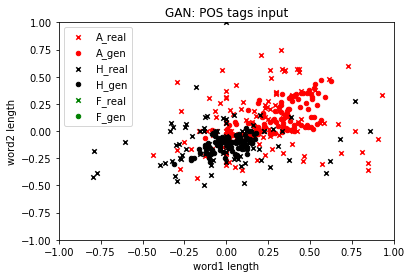

0.36203486387040323 2003
4    199
Name: lengths, dtype: int64


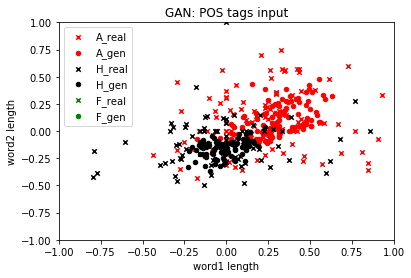

0.3514113470609098 2003
4    199
Name: lengths, dtype: int64


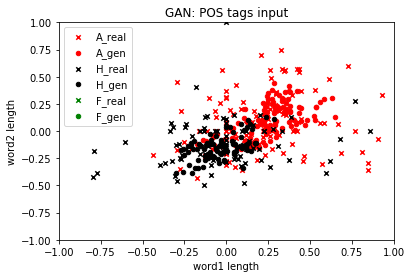

In [167]:
for i in range(399, 1300, 400):
    filename = 'GAN_POSTAGS_AFH_lrd0.0001_FINAL' + str(i) + '.txt' 
    get_plots(filename, 'GAN: POS tags input')

0.38434119281470336 2003
4    199
Name: lengths, dtype: int64


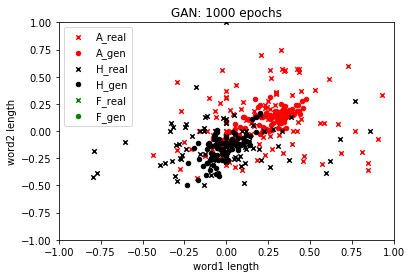

0.38434119281470336 2003
4    199
Name: lengths, dtype: int64


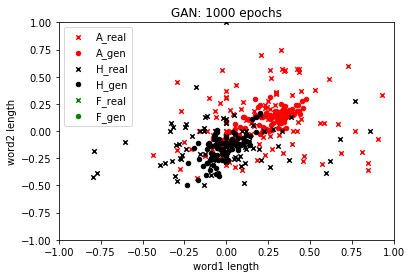

In [168]:
for i in range(1399, 1700, 200):
    filename = 'GAN_TEXT_AFH_lrd0.0001_FINAL999.txt'
    get_plots(filename, 'GAN: 1000 epochs')

0.6677478573372019 2003
4    199
Name: lengths, dtype: int64


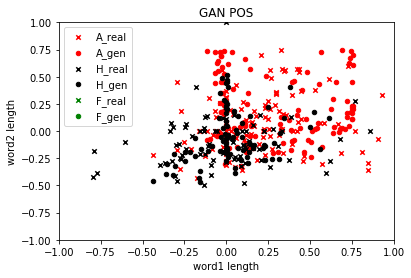

In [166]:
filename = 'outputs/GAN_old_WassSignFIX_NOPad_clamp5_Noise10_1by5_AFH_lrd0.0001POSTags_1samples_test.txt'
df = pd.read_csv(filename, sep='\t', header=None, names=['gen_emotion', 'text', 'raw', 'generated'])
raw_lengths = [[float(y) for y in x[1:-1].replace(',','').split()] for x in df.raw.tolist()]
generated = [[float(y) for y in x[1:-1].replace(',','').split()] for x in df.generated.tolist()]

rmse = []
for i in range(len(raw_lengths)):
    rmse.append(np.sum((np.array(raw_lengths[i]) - np.array(generated[i]))**2))

# df['rmse'] = rmse
# df = df.reset_index()
df.head(2)

get_plots(filename, 'GAN POS')

0.315706413639625
4    199
Name: lengths, dtype: int64


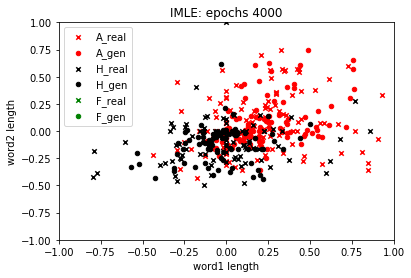

In [106]:
filename = 'outputs/IMLE_run_TMP_test_2000.txt'
get_plots(filename, 'IMLE: epochs 4000')


0.3149982936074318
4    199
Name: lengths, dtype: int64


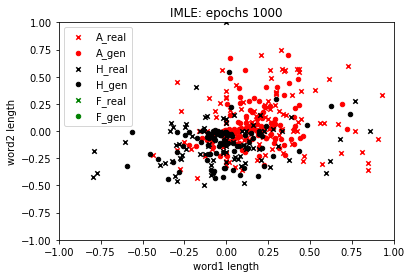

In [99]:
filename = 'outputs/IMLE_run_TMP_test_1400.txt'
get_plots(filename, 'IMLE: epochs 1000')

In [55]:
for x in range(1799, 5000, 400):
    filename = 'outputs/GAN_5000/GAN_old_WassSignFIX_NOPad_clamp5_Noise10_1by5_AFH_lrd0.0001_FINAL' + str(x) + '.txt'
    df = pd.read_csv(filename, sep='\t', header=None, names=['gen_emotion', 'text', 'raw', 'generated'])
    raw_lengths = [[float(y) for y in x[1:-1].replace(',','').split()] for x in df.raw.tolist()]
    generated = [[float(y) for y in x[1:-1].replace(',','').split()] for x in df.generated.tolist()]

    rmse = 0
    for i in range(len(raw_lengths)):
        rmse += np.sum((np.array(raw_lengths[i]) - np.array(generated[i]))**2)

    print(x, rmse/len(raw_lengths))

1799 0.3504662538598049
2199 0.33774670850272814
2599 0.3319061059206936
2999 0.3205758224423237
3399 0.3082963629887931
3799 0.3018612573771904
4199 0.2977050544024005
4599 0.28974242356955043
4999 0.28429233504585977


0.2981774181792827
4    597
Name: lengths, dtype: int64


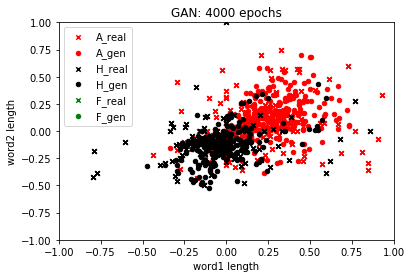

In [100]:
filename = 'outputs/GAN_5000/GAN_old_WassSignFIX_NOPad_clamp5_Noise10_1by5_AFH_lrd0.0001_FINAL3999.txt'
get_plots(filename, 'GAN: 4000 epochs')

0.3653847975795694
4    597
Name: lengths, dtype: int64


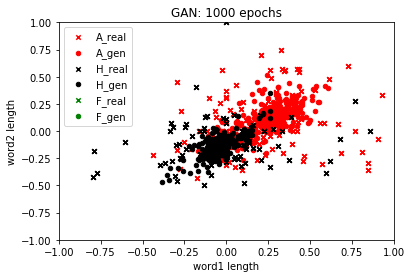

In [101]:
filename = 'outputs/GAN_5000/GAN_old_WassSignFIX_NOPad_clamp5_Noise10_1by5_AFH_lrd0.0001_FINAL1399.txt'
get_plots(filename, 'GAN: 1000 epochs')

In [354]:
def get_plots():
    features[features > 1.5] = 1.5
    emotion_dict = {'A':0, 'D':1, 'F':2, 'H':3, 'N':4, 'S':5}
    df['emotion_id'] = [emotion_dict[x] for x in df.emotion.tolist()]
    word_lengths_ = df.neutral_relative_word_lengths.tolist()
    word_lengths = []
    [word_lengths.append([float(y.replace(',','')) for y in x[1:-1].split()]) for x in word_lengths_]
    word_lengths = np.array(word_lengths)

    snsdf = pd.DataFrame()
    snsdf["emotion"] = df.emotion_id.tolist()
    snsdf["word1"] = word_lengths[:,0]
    snsdf["word2"] = word_lengths[:,1]

    sns.scatterplot(x="mean", y="var", hue=snsdf.emotion.tolist(),
                    palette=sns.color_palette("hls", df.emotion.nunique()),
                    data=snsdf).set(title="Iris data T-SNE projection") 
    plt.show()

    tsne = TSNE(n_components=2, verbose=1, random_state=123)
    z = tsne.fit_transform(features) 

    snsdf = pd.DataFrame()
    snsdf["emotion"] = df.emotion_id.tolist()
    snsdf["comp1"] = z[:,1]
    snsdf["comp2"] = z[:,0]

    sns.scatterplot(x="comp1", y="comp2", hue=snsdf.emotion.tolist(),
                    palette=sns.color_palette("hls", df.emotion_id.nunique()),
                    data=snsdf).set(title="T-SNE projection") 
    plt.show()

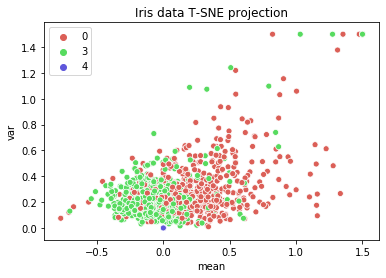

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2002 samples in 0.001s...
[t-SNE] Computed neighbors for 2002 samples in 0.027s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2002
[t-SNE] Computed conditional probabilities for sample 2000 / 2002
[t-SNE] Computed conditional probabilities for sample 2002 / 2002
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.520020
[t-SNE] KL divergence after 1000 iterations: 1.152289


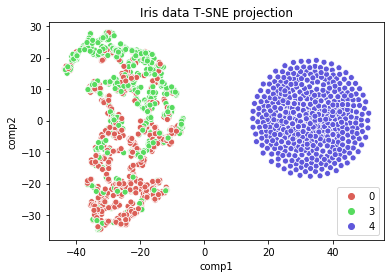

In [111]:
# A and H and N
get_plots()

In [107]:
def get_plots_old(filename, title_):
    
    df = pd.read_csv(filename, sep='\t', header=None, names=['gen_emotion', 'raw', 'generated'])
    raw_lengths = [[float(y) for y in x[1:-1].replace(',','').split()] for x in df.raw.tolist()]
    generated = [[float(y) for y in x[1:-1].replace(',','').split()] for x in df.generated.tolist()]
    
    rmse = []
    for i in range(len(raw_lengths)):
        rmse.append(np.sum((np.array(raw_lengths[i]) - np.array(generated[i]))**2))
    
    print(sum(rmse)/len(rmse))

    raw_lengths_ = []
    for x in raw_lengths:
        x_ = []
        for k in x:
            if k!= 0:
                x_.append(k)
        raw_lengths_.append(x_)
    raw_lengths = raw_lengths_
    
    df['lengths'] = [len(x) for x in raw_lengths]
    df = df[df['lengths'] == 4]
    
    print(df['lengths'].value_counts())
    
    colors_dict = {0:'red', 1:'black', 2:'green'}
    emotions_dict = {0:'A', 1:'H', 2:'F'}
    

    for emotion in [0,1,2]:
        newdf = df[df.gen_emotion == emotion]
        
        raw_lengths = [[float(y) for y in x[1:-1].replace(',','').split()] for x in newdf.raw.tolist()]
        generated = [[float(y) for y in x[1:-1].replace(',','').split()] for x in newdf.generated.tolist()]

        snsdf = pd.DataFrame()
        snsdf["word1"] = [x[3] for x in raw_lengths]
        snsdf["word2"] = [x[1] for x in raw_lengths]
        snsdf["word3"] = [x[2] for x in raw_lengths]
        snsdf["word4"] = [x[0] for x in raw_lengths]
    
        plt.scatter(snsdf.word1, snsdf.word2, c = colors_dict[emotion], marker = 'x', label=emotions_dict[emotion]+"_real", s=20)

        snsdf2 = pd.DataFrame()
        snsdf2["word1"] = [x[3] for x in generated]
        snsdf2["word2"] = [x[1] for x in generated]
        snsdf2["word3"] = [x[2] for x in generated]
        snsdf2["word4"] = [x[0] for x in generated]
        
        plt.scatter(snsdf2.word1, snsdf2.word2, c = colors_dict[emotion], marker = 'o', label=emotions_dict[emotion]+"_gen", s=20)
        
       

    plt.title(title_) 
    plt.xlabel('word1 length')
    plt.ylabel('word2 length')
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.legend()
    plt.show()
    

0.7507511527575321
4    199
Name: lengths, dtype: int64


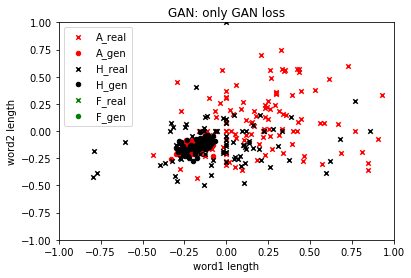

In [108]:
filename = 'outputs_old//GAN_old_WassSignFIX_NOPad_clamp5_Noise10_1by5_ADH_NoRecons999.txt'
get_plots_old(filename, title_='GAN: only GAN loss')

0.47850990194422627
4    199
Name: lengths, dtype: int64


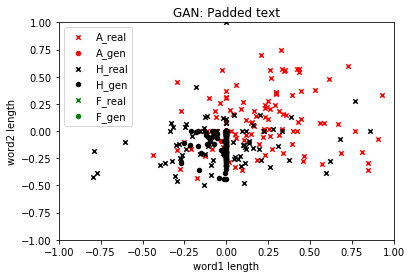

In [109]:
filename = 'outputs_old//GAN_old_WassSignFIX_NOPad_clamp5_Noise10_1by5_ADH_lrd0.0005_padded999.txt'
get_plots_old(filename, title_='GAN: Padded text')


0.3985694796063438
4    199
Name: lengths, dtype: int64


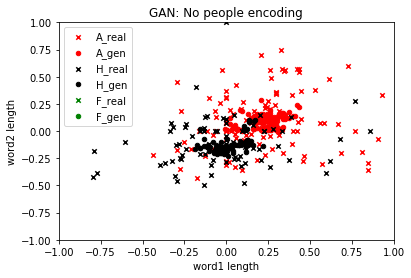

In [110]:
filename = 'outputs_old//GAN_old_WassSignFIX_NOPad_clamp5_Noise10_1by5_ADH_lrd0.0001nopeople999.txt'
get_plots_old(filename, title_='GAN: No people encoding')

0.2977522291698815
4    199
Name: lengths, dtype: int64


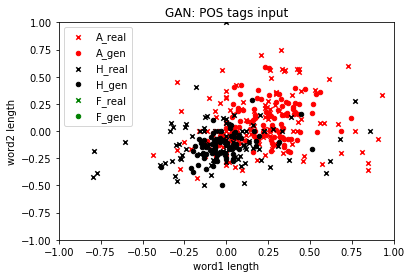

In [111]:
filename = 'outputs_old/GAN_old_WassSignFIX_NOPad_clamp5_Noise10_1by5_ADH_lrd0.0005postagsbatch2padded999.txt'
get_plots_old(filename, title_='GAN: POS tags input')

4    199
Name: lengths, dtype: int64
0.2624840384121195


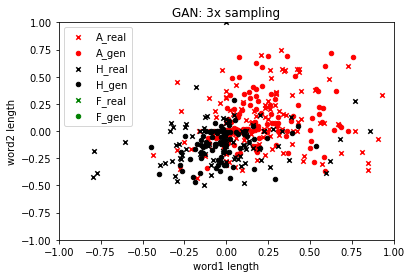

In [87]:
filename = 'outputs_old//GAN_old_WassSignFIX_NOPad_clamp5_Noise10_1by5_ADH_lrd0.00054000epoch3999.txt'
get_plots_old(filename, title_='GAN: 3x sampling')

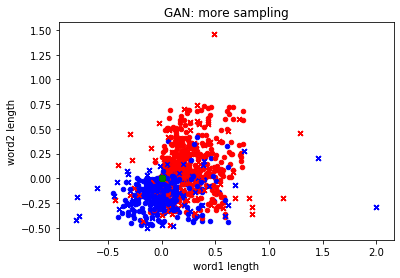

In [619]:
filename = 'GM/speech_timing/modelling/GAN_old_WassSignFIX_NOPad_clamp5_Noise10_1by5_ADH_lrd0.00054000epoch3999.txt'
get_plots(raw_lengths, generated, filename, title_='GAN: more sampling')

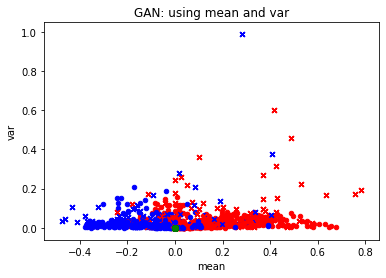

In [623]:
filename = 'GM/speech_timing/modelling/GAN_old_WassSignFIX_NOPad_clamp5_Noise10_1by5_ADH_NoRecons999.txt'
get_plots(raw_lengths, generated, filename, title_='GAN: using mean and var')

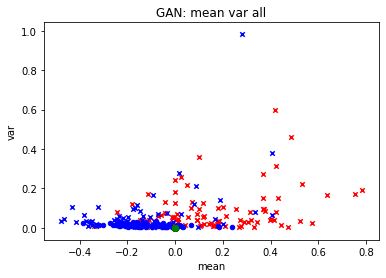

In [630]:
filename = 'GM/speech_timing/modelling/GAN_old_WassSignFIX_NOPad_clamp5_Noise10_1by5_ADH_lrd0.0001meanvarall999.txt'
get_plots(raw_lengths, generated, filename, title_='GAN: mean var all')

### OLD VERSION with TSNE

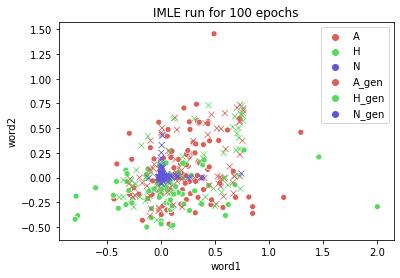

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.000s...
[t-SNE] Computed neighbors for 618 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.484310
[t-SNE] KL divergence after 1000 iterations: 0.393407


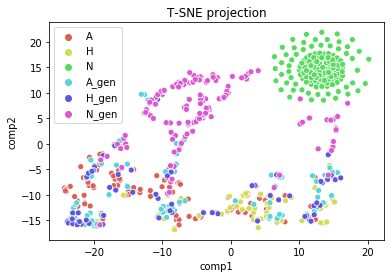

In [449]:
filename = 'GM/speech_timing/modelling/outputs/IMLE_run_TMP_test.txt'
get_plots(raw_lengths, generated, filename)
